Diferenças entre **classificação** e **clusterização**:

- **Classificação**: A técnica de classificação é utilizada quando existem rótulos (labels) já definidos. Com a entrada de uma nova observação na base resta apenas identificar sua categoria.

- **Clusterização**: Técnica usada para descobrir o perfil ou as características de uma observação quando não se tem ideia das categorias de uma base.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"
dataframe = pd.read_csv(uri)

In [3]:
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Organizando e limpando a base de dados:

In [4]:
dataframe.drop(columns=["CUST_ID","TENURE"], inplace=True)

In [5]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [6]:
# Dados faltantes:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [7]:
# Preenchendo os dados com a mediana da coluna:
dataframe.fillna(dataframe.median(), inplace=True)

In [8]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [9]:
# Normalização dos dados:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [10]:
# Realizando a clusterização com SKMeans:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

### Métricas de Validação:
- **Externas**: precisamos ter os labels;
- **Internas**: independe dos labels.

Sobre as métricas **internas**:
- Método de compactação: ver o quão perto estão os pontos parecidos;
- Critério de separação: quão bem estão separados os clusters diferentes;

### Coeficiente de Silhouette:

\begin{equation}
s=\frac{(b-a)}{max(a,b)}
\end{equation}

a = distância média entre o ponto e todos os outros pontos do mesmo cluster (compactação). A distância entre cada um dos pontos pode ser capturada através da distância euclidiana:

\begin{equation}
d(A,B) = \sqrt{(x_B - x_A)^2 + (y_B - y_A)^2}
\end{equation}

b = distância média entre o ponto e todos os outros pontos do cluster mais próximo (separação). A distância entre cada um dos pontos pode ser capturada através da distância euclidiana. 

**O coeficiente de Silhoette varia de [-1, 1]. Quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos estão muito perto ou até interseccionando um outro cluster.**

In [11]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3645215278615073


### Índice Davies-Bouldin:

\begin{equation}
DB=\frac{1}{k} \sum_{i=1}^{k}{max_{i \neq j} R_{ij}}
\end{equation}

Entendendo R:

\begin{equation}
R_{ij} = \frac{s_{i} + s_{j}}{d_{ij}}
\end{equation}

R é a medida de similaridade entre dois clusters i e j. s representa a similaridade dentro do cluster (compactação) e d representa similaridade entre clusters (separação):
- s = distância média entre cada ponto e o seu centróide (média entre os pontos do cluster).
- d =  distância entre os centróides (média entre os pontos do cluster) dos clusters em questão.

Se a distância entre os centróides é pequena, isto é, a separação entre os clusters é pequena, o valor de R vai ser maior. Se o valor de R é pior é a medida de similaridade entre clusters.

Se o valor de DBS é alto, pode-se considerar que a clusterização não foi tão boa. Quanto mais próximo de 0, melhor!

In [12]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0763130509611745


### Índice Calisnski-Harabasz:

\begin{equation}
s=\frac{tr(B_{k})}{tr(W_{k})} \times \frac{n_{E} - k}{k-1}
\end{equation}

Entendendo a segunda parte da fórmula:

- $n_{E}$, número de elementos total.
- $k$, número de clusters.

Entendendo a primeira parte da fórmula:

- $B_{k}$, dispersão dos elementos entre (between) clusters.
- $W_{k}$, dispersão dos elementos dentro (within) dos clusters.

**O que é o $W_{k}$?**

\begin{equation}
W_{k}=\sum_{q=1}^{k}\sum_{x \in C_{q}}{(x-c_{q})(x-c_{q})^{T}},
\end{equation}

sendo que:
- $k$ = número de clusters
- $q$ = cluster
- $(x-c_{q})$ = diferença entre um ponto no cluster e seu centróide
- $T$ significa matriz transposta

A última parte do termo representa uma matriz de variância-covariância. A fórmula do índice Calisnski-Harabasz pede o traço da matriz $W_{k}$, isto é, a soma dos elementos da diagonal que, no caso, é a soma da variância dos valores das features de cada um dos clusters somados. 

*Exemplo: var(x) = var(x) para o cluster 1 + ... + var(x) para o cluster n.*

**O que é o $B_{k}$?**

\begin{equation}
B_{k}=\sum_{q=1}^{k}{n_{q}(c_{q}-c_{E})(c_{q}-c_{E})^{T}},
\end{equation}

sendo que:
- $k$ = número de clusters
- $q$ = cluster
- $n_{q}$ = número de elementos no cluster
- $(c_{q}-c_{E})$ = diferença entre os centróides dos clusters e o centróide dos elementos 
- $T$ significa matriz transposta 

A última parte do termo representa uma matriz de variância-covariância. A fórmula do índice Calisnski-Harabasz pede o traço da matriz $B_{k}$, isto é, a soma dos elementos da diagonal que, no caso, é a soma da variância dos centróides de cada um dos clusters somados. 

*Exemplo: var(x) = var(x) para o cluster 1 + ... + var(x) para o cluster n.*

In [13]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7957864443015


### Validação Relativa: validando a clusterização conforme o número de clusters aumenta

In [14]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    y_pred = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [15]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3645215278615073 1.0763130509611745 3431.7957864443015


In [16]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3645215278615073 1.0763130509611745 3431.7957864443015


In [17]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3645215278615073 1.0763130509611745 3431.7957864443015


In [18]:
s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.3645215278615073 1.0763130509611745 3431.7957864443015


Teoricamente, o número de cada uma das métricas deveria mudar, mas não foi isso que aconteceu. Apesar disso, o que é mais importante de se verificar é que quanto maiores os valores dos índices, os clusters serão melhores.

### Outra forma de validação: usando dados aleatórios

In [19]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [20]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

-0.005431868585324338 83.34722836852625 0.6567223333925499
0.3645215278615073 1.0763130509611745 3431.7957864443015


Métricas da clusterização feita com a base de dados do cartão de crédito são melhores comparados aos da base de dados aleatória. De outra forma a clusterização foi validada. 

### Validação da estabilidade da clusterização:

In [21]:
set1, set2, set3 = np.array_split(values, 3)
s_1, dbs_1, calinski_1 = clustering_algorithm(5, set1)
s_2, dbs_2, calinski_2 = clustering_algorithm(5, set2)
s_3, dbs_3, calinski_3 = clustering_algorithm(5, set3)
print(s_1, dbs_1, calinski_1)
print(s_2, dbs_2, calinski_2)
print(s_3, dbs_3, calinski_3)

ValueError: Found input variables with inconsistent numbers of samples: [2984, 8950]

O código nessa parte deu erro, mas o que era importante de ser mostrado na aula era que a clusterização na base dividida deveria apresentar o mesmo valor ou valores parecidos para todas as métricas comprovando assim a estabilidade da clusterização.

### Visualizando os clusters:

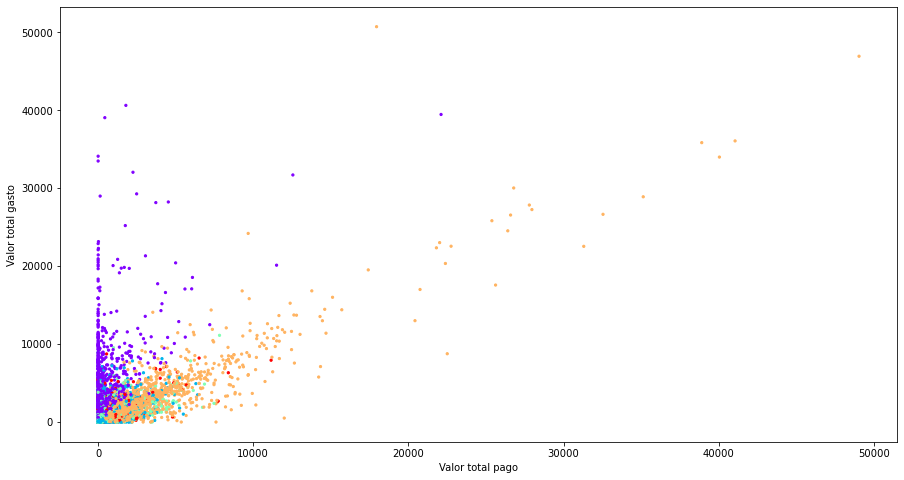

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show()

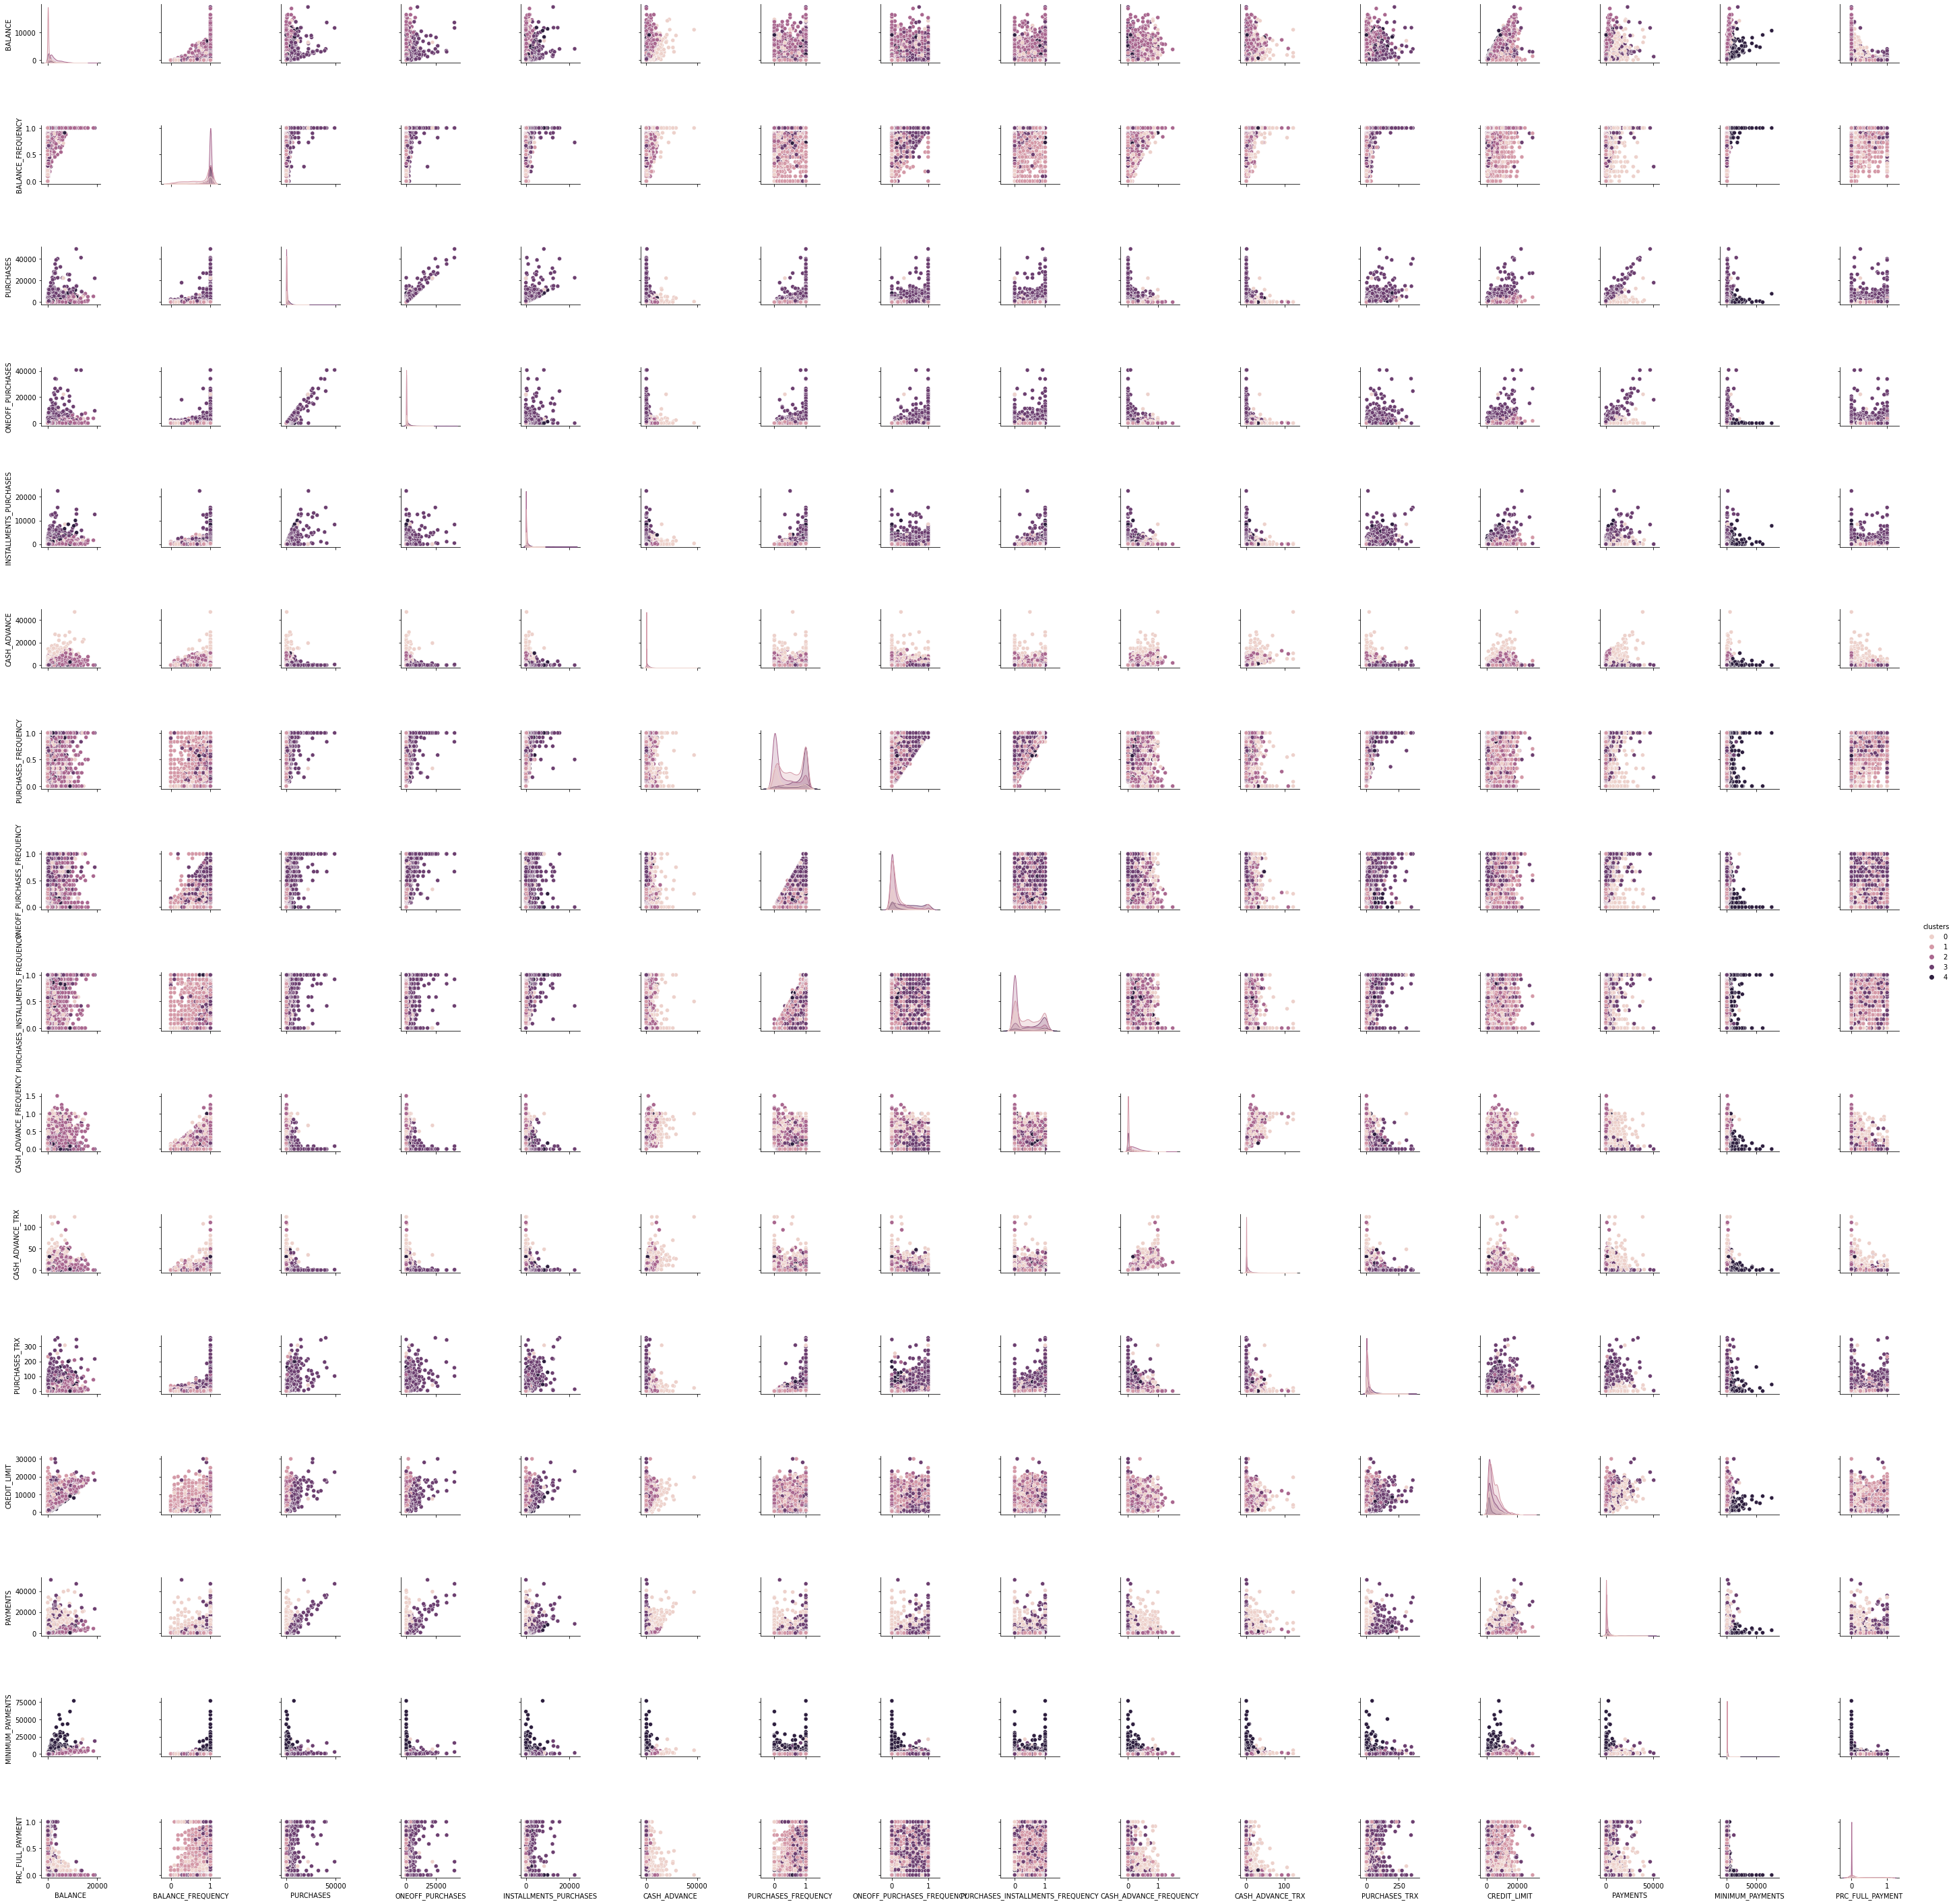

In [23]:
dataframe['clusters'] = labels
sns.pairplot(dataframe[0:], hue="clusters")

### Entendendo os valores dos atributos no cluster

In [24]:
dataframe.groupby("clusters").describe()

BALANCE                                                    \
           count         mean          std        min          25%   
clusters                                                             
0         1076.0  1794.981763  1980.088450   0.000000   507.892306   
1         3280.0   443.746756   846.398201   0.000000    23.365333   
2         2648.0  3038.132314  2479.290949   6.824905  1256.126442   
3         1535.0  1142.229612  1665.393296   0.000000   212.073923   
4          411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                 BALANCE_FREQUENCY            \
                  50%          75%           max             count      mean   
clusters                                                                       
0         1092.020518  2316.353276  14581.459140            1076.0  0.862541   
1           82.941478   410.126094   9630.367575            3280.0  0.774389   
2         2173.994774  4224.605542  18495.558550            2648.0  0.963768   
3          553.534453  1370.143507  19043.138560            1535.0  0.928174   
4         1337.287314  2138.678431  11670.179850             411.0  0.989486   

          ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
          ...              75%           max            count      mean   
clusters  ...                                                             
0         ...       884.718306  21235.065300           1076.0  0.117180   
1         ...       248.733727   4483.503862           3280.0  0.246806   
2         ...      1330.437428   8345.641905           2648.0  0.001800   
3         ...       524.475206  18621.013310           1535.0  0.278458   
4         ...      7112.618584  76406.207520            411.0  0.019318   

                                                       
               std  min  25%       50%       75%  max  
clusters                                               
0         0.186583  0.0  0.0  0.083333  0.142857  1.0  
1         0.346748  0.0  0.0  0.000000  0.444444  1.0  
2         0.023264  0.0  0.0  0.000000  0.000000  0.6  
3         0.367223  0.0  0.0  0.083333  0.545455  1.0  
4         0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

Impossível/custoso avaliar todos os atributos, logo é interessante restringir a análise a alguns deles. Mas quais são importantes?

In [25]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35130874e-01 2.16176055e-04 6.10009048e-02 3.47883691e-02
  2.62177310e-02 3.99972670e-01 5.28372141e-05 2.06513171e-05
  3.52896706e-05 6.53972970e-05 1.56905312e-03 1.13034860e-03
  5.35512196e-01 5.97426885e-01 1.04352164e-01 2.76655815e-05]
 [6.90621793e-02 2.30691751e-04 1.21729263e-01 4.81910459e-02
  7.36397310e-02 2.43014295e-02 1.72787065e-04 3.37151400e-05
  1.40216225e-04 7.91376675e-06 1.23811319e-04 2.86405121e-03
  9.43437116e-01 1.54009810e-01 5.68268963e-02 7.61282213e-05]
 [5.04294070e-01 2.72242076e-04 6.17554553e-02 3.62405829e-02
  2.55365937e-02 2.52765717e-01 6.72943541e-05 2.57072238e-05
  4.50409323e-05 5.74261583e-05 1.15669149e-03 1.33139220e-03
  7.19260678e-01 1.66160406e-01 1.79203910e-01 5.52512128e-07]
 [1.60319869e-01 2.45706823e-04 4.39135282e-01 2.57210578e-01
  1.82094093e-01 2.54406828e-02 2.04763417e-04 8.90736666e-05
  1.51011492e-04 9.38125185e-06 1.69595053e-04 6.18611556e-03
  6.02998055e-01 4.02759797e-01 8.56323650e-02 7.20683321e-05]
 [3.

Os atributos com valores diferentes em cada cluster podem ser um ponto de partida para escolhermos os melhores para análise. Vamos analisar a variância de cada um deles:

In [26]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


**Atributos com maior variabilidade:**
- BALANCE - 0.0224 
- PURCHASES - 0.0196 
- CASH_ADVANCE - 0.0226
- CREDIT_LIMIT - 0.0360
- PAYMENTS - 0.0280

In [27]:
description = dataframe.groupby("clusters")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]].describe()

In [36]:
description

BALANCE                                                    \
           count         mean          std        min          25%   
clusters                                                             
0         1076.0  1794.981763  1980.088450   0.000000   507.892306   
1         3280.0   443.746756   846.398201   0.000000    23.365333   
2         2648.0  3038.132314  2479.290949   6.824905  1256.126442   
3         1535.0  1142.229612  1665.393296   0.000000   212.073923   
4          411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                 PURCHASES               ...  \
                  50%          75%           max     count         mean  ...   
clusters                                                                 ...   
0         1092.020518  2316.353276  14581.459140    1076.0   481.273522  ...   
1           82.941478   410.126094   9630.367575    3280.0   629.249107  ...   
2         2173.994774  4224.605542  18495.558550    2648.0   385.096760  ...   
3          553.534453  1370.143507  19043.138560    1535.0  3274.143199  ...   
4         1337.287314  2138.678431  11670.179850     411.0   854.865815  ...   

         CREDIT_LIMIT          PAYMENTS                                        \
                  75%      max    count         mean          std         min   
clusters                                                                        
0              6000.0  21000.0   1076.0  4708.267438  5002.498918  193.747321   
1              7000.0  30000.0   3280.0   814.294226   963.480969    0.000000   
2              6500.0  22000.0   2648.0   968.599396   920.305001    0.000000   
3              6000.0  30000.0   1535.0  3036.228833  4073.452756    0.000000   
4              2500.0  11500.0    411.0  1336.238911  1441.018204   27.832777   

                                                               
                  25%          50%          75%           max  
clusters                                                       
0         1686.687238  3061.887952  5964.304792  40627.595240  
1          221.073805   499.038060  1047.179868   8946.495566  
2          377.165926   677.992099  1288.849300  11123.409180  
3          942.531150  1883.762278  3719.392325  50721.483360  
4          435.475022   864.471651  1611.923446   8735.607835  

[5 rows x 40 columns]

In [30]:
dataframe.groupby("clusters")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,1076.0,0.117180,0.186583,0.0,0.0,0.083333,0.142857,1.0
1,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
2,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
3,1535.0,0.278458,0.367223,0.0,0.0,0.083333,0.545455,1.0
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0


**CLUSTER 0:** Clientes que gastam muito com saques. Pagam às vezes. <br>
**CLUSTER 1:** Clientes que gastam pouco. Clientes com maior limite. Bons pagadores. Maior número de clientes. <br>
**CLUSTER 2:** Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes. <br>
**CLUSTER 3:** Clientes que gastam muito com compras. Melhores pagadores. <br>
**CLUSTER 4:** Clientes com o menor limite de crédito. Não são bons pagadores. Menor quantidade de clientes.

### Uma estratégia:
- O grupo 1 tem o maior número de clientes, é bom pagador e gasta pouco. Se houvesse um incentivo para fazer com que eles comprassem mais, o impacto nos lucros da empresa de cartão de crédito seria grande. O que poderia ser feito seria a aplicação de um programa de pontos (parceria com outra empresa, por exemplo, de viagens) para estimular o consumo desse grupo.
- Uma forma de avaliar se essa medida é realmente benéfica seria dividindo esse grupo 1 em grupo de controle e teste durante um ano. Dessa forma, verificaríamos os efeitos apenas da aplicação do programa.